change a little bit and practice and other stuff. 

I choose to check the identification if a shelf is empty or not

In [3]:
import duckduckgo_search
from fastcore.all import *
from fastdownload import download_url
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(duckduckgo_search.DDGS().images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('real nearly empty consumer goods shelf photos', max_images=1)
urls[0]

Searching for 'real nearly empty consumer goods shelf photos'


'https://d.newsweek.com/en/full/2001966/empty-grocery-store-shelves.jpg'

In [5]:

urls = search_images('real consumer goods shelf photos', max_images=1)
urls[0]

Searching for 'real consumer goods shelf photos'


'https://thumbs.dreamstime.com/z/neat-shelves-goods-chinese-supermarkets-neatly-arranged-shelves-supermarkets-132119102.jpg'

c:\Users\IM_py\anaconda3\lib\asyncio\events.py:80: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)
c:\Users\IM_py\anaconda3\lib\asyncio\events.py:80: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


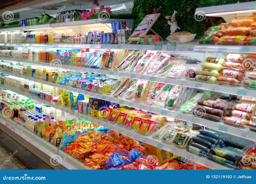

In [6]:

dest = 'full_shelf.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'real nearly empty consumer goods shelf photos'


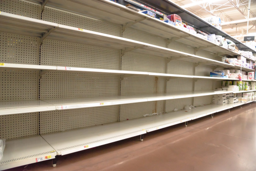

c:\Users\IM_py\anaconda3\lib\asyncio\events.py:80: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


In [7]:
download_url(search_images('real nearly empty consumer goods shelf photos', max_images=1)[0], 'nearly_emp_shelf.jpg', show_progress=False)
Image.open('nearly_emp_shelf.jpg').to_thumb(256,256)

In [8]:
searches = 'real_nearly_empty','full'
path = Path('full_or_not')
from time import sleep


In [13]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} consumer goods shelf photos'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'real_nearly_empty consumer goods shelf photos'
Searching for 'full consumer goods shelf photos'


In [14]:
def check_splitter(items):
    splitter = RandomSplitter(valid_pct=0.2, seed=42)
    splits = splitter(items)
    print(f"Train split: {len(splits[0])}, Valid split: {len(splits[1])}")
    return splits

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=check_splitter,
    get_y=parent_label,
    item_tfms=Resize(192, method='squish')
).dataloaders(path)



Train split: 84, Valid split: 20


The pictures are stored as numbers based on the rgb of each pixel.

In [15]:
failed = verify_images(get_image_files(path = path))
#failed.map(Path.unlink)

In [17]:
failed.map(Path.unlink)

(#1) [None]

In [18]:
print(f"Total images: {len(get_image_files(path=path))}")

Total images: 103


In [19]:
len(dls.train)

1

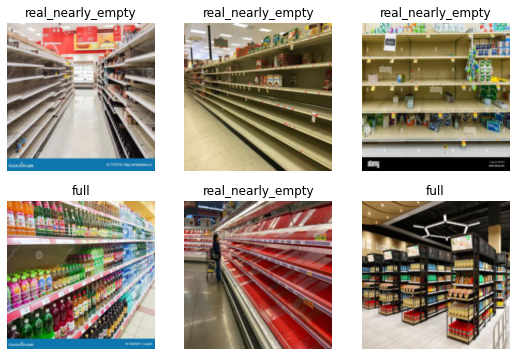

In [23]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.042713,1.361763,0.400000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.045832,1.071162,0.400000,00:04
1,1.126265,0.357620,0.150000,00:04
2,0.796828,0.179308,0.050000,00:04


In [27]:
is_full,_,probs = learn.predict(PILImage.create('full_shelf.jpg'))
print(f"This is a: {is_full}.")
print(f"Probability it's a full shelf: {probs[0]:.4f}")

This is a: full.
Probability it's a full shelf: 0.8606
